In [ ]:
pip install tflearn

     |████████████████████████████████| 107 kB 5.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=299d03797089d49b2c19fe772662af4174c569ec6afa5a56233fbe19ff0af75f
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
from PIL import Image
from sklearn.utils import class_weight
from imageio import imread
from joblib import Parallel, delayed
import tflearn as tf
from tflearn.data_utils import build_hdf5_image_dataset
from scipy.ndimage import rotate
import h5py
import numpy as np 
import pandas as pd
%matplotlib inline
from IPython.display import clear_output
pd.options.mode.chained_assignment = None
from keras.layers import Input, merge
from keras.layers import Convolution2D , concatenate ,Conv2D,Dense
from keras.layers import Activation,Dropout, GlobalAveragePooling2D,MaxPooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam ,SGD,RMSprop
from tensorflow.keras.utils import  to_categorical
import tensorflow as tf
import numpy as np
# import matplotlib.pyplot as plt
# print(matplotlib.__file__)
from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.activations import *
from keras.callbacks import *

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def fire_module(input_layer, squeeze =16 , expansion =32):

# a definition for fire module et.al https://github.com/rcmalli/keras-squeezenet/
# inspiration out = tf.map_fn(lambda x: threshold_binarize(x, threshold=0.5) , out, dtype=tf.int64)
# squeezing using 1x1 kernel and expansion with 1x1 and 3x3. Concatenate the output to get best result.
    fire_sq =   Conv2D(squeeze,1,1,activation= 'relu',kernel_initializer='glorot_normal')(input_layer)
    model.add(BatchNormalization())
    fire_exp1 = Conv2D(expansion ,kernel_size=(1,1),activation='relu',padding='valid')(fire_sq)
    model.add(BatchNormalization())
    fire_exp2 = Conv2D(expansion ,kernel_size=(3,3),activation='relu',padding='same')(fire_sq)
    model.add(BatchNormalization())
    out = concatenate([fire_exp1,fire_exp2], axis=3)

    return out
# y_score = []
def build_squeezenet(input_shape):
    
    input_layer = Input(shape = input_shape)
    
    out = Conv2D(96, kernel_size =(3, 3), activation='relu')(input_layer)
    out = MaxPooling2D(pool_size=2, strides=None, padding='valid')(out)
    # no mxpooling done since small images 
    out = fire_module(out,squeeze =16 , expansion =64)
    out = fire_module(out,squeeze = 16 , expansion=64)
    
    out = fire_module(out,squeeze= 32,expansion = 128)
    out = fire_module(out,squeeze= 32,expansion = 128)
    
    out = fire_module(out , squeeze = 48 ,expansion=192)
    out = fire_module(out,squeeze = 48 , expansion = 192)
    
    out = fire_module(out,squeeze = 64 , expansion = 256)
    out = fire_module(out,squeeze = 64 , expansion = 256)
    
    out = Dropout(0.5)(out)
    out = Conv2D(32,kernel_size=(1,1),padding='valid',activation='relu')(out)
    out = GlobalAveragePooling2D()(out)
    out= Dense(1024, activation= "relu")(out)
    out= Dense(512, activation= "relu")(out)
    out= Dense(128, activation= "relu")(out)
    out= Dense(64, activation= "relu")(out)
    out= Dense(32, activation= "relu")(out)
    out= Dense(16, activation= "relu")(out)
    #out= Dense(8, activation= "relu")(out)
    out = Dense(2, activation="softmax")(out)
#     y_score =out[:,]   
    model = Model(input_layer, out, name='squeezenet')
    return model 
#1024, 512, flatten, 

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
splitfolders.ratio('/content/drive/MyDrive/lidc', output="output", seed=1337, ratio=(0.8, 0.1,0.1))
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
 'output/train',
 target_size=(224,224),
 batch_size=16,
 seed=100,
 color_mode= 'grayscale',
 class_mode = 'binary',
shuffle=True)
# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
 'output/val',
 target_size=(224,224),
 batch_size=16,
 seed=1000,
 color_mode= 'grayscale',
 class_mode = 'binary',
 shuffle=False)
test_generator = test_datagen.flow_from_directory(
 'output/test',
 target_size=(224, 224),
 batch_size=16,
 seed=500,
 color_mode= 'grayscale',
 class_mode = 'binary',
 shuffle=False)

model_dw = build_squeezenet(input_shape= (224,224,1))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam= Adam(lr=0.0001)
model_dw.compile(
    optimizer=sgd, loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# weights = class_weight.compute_class_weight('balanced',
#                                             np.unique(val_labels[:,0]) ,
#                                             val_labels[:,0])

#wt = np.array([ 0.4,0.6])
#model_dw.summary()

Copying files: 1017 files [00:03, 272.86 files/s]


Found 813 images belonging to 2 classes.
Found 101 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [ ]:
CONV1_NUM_FILTERS = 16
CONV1_KERNEL_SIZE = [3, 3]
CONV1_STRIDE = 1
CONV1_PADDING = 'SAME' #with zero padding
CONV1_ACTIV_FUNC = tf.nn.relu
POOL1_FILTER_SIZE = [2, 2]
POOL1_STRIDE = 2
POOL1_PADDING = 'SAME'

CONV2_NUM_FILTERS = 32
CONV2_KERNEL_SIZE = [5, 5]
CONV2_STRIDE = 1
CONV2_PADDING = 'SAME'
CONV2_ACTIV_FUNC = tf.nn.relu
POOL2_FILTER_SIZE = [2, 2]
POOL2_STRIDE = 2
POOL2_PADDING = 'SAME'

CONV3_NUM_FILTERS = 64
CONV3_KERNEL_SIZE = [7, 7]
CONV3_STRIDE = 1
CONV3_PADDING = 'SAME'
CONV3_ACTIV_FUNC = tf.nn.relu
POOL3_FILTER_SIZE = [2, 2]
POOL3_STRIDE = 2
POOL3_PADDING = 'SAME'
CONV4_NUM_FILTERS = 64
CONV4_KERNEL_SIZE = [7, 7]
CONV4_STRIDE = 1
CONV4_PADDING = 'SAME'
CONV4_ACTIV_FUNC = tf.nn.relu
POOL4_FILTER_SIZE = [2, 2]
POOL4_STRIDE = 2
POOL4_PADDING = 'SAME'
FC1_NUM_NEURONS = 1024
FC1_ACTIV_FUNC = tf.nn.relu
def modrun():

        input_shape = (224,224,1)
        
        model = Sequential()
        img_width, img_height = 224, 224
        
        #convolution layer 1
        model.add(Conv2D(CONV1_NUM_FILTERS, kernel_size=(CONV1_KERNEL_SIZE[0],CONV1_KERNEL_SIZE[1]), strides=(1, 1), padding = 'same',
                 activation='relu',data_format="channels_last"))
      
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding = 'same'))
        
        #convolution layer 2
        model.add(Conv2D(CONV2_NUM_FILTERS, kernel_size=(CONV2_KERNEL_SIZE[0],CONV2_KERNEL_SIZE[1]), strides=(1, 1), padding = 'same',
                 activation='relu'))        

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding = 'same'))

        #convolution layer 3
        model.add(Conv2D(CONV3_NUM_FILTERS, kernel_size=(CONV3_KERNEL_SIZE[0],CONV3_KERNEL_SIZE[1]), strides=(1, 1), padding = 'same',
                 activation='relu'))        

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding = 'same'))
                
        
        # densely connected layer
        # image size has been reduced to 10x10 so we will add a fully-connected layer with 1024 neurons
        model.add(Flatten())
        
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.2))

        # readout layer
        model.add(Dense(1))
        
        model.add(Activation('sigmoid'))
        

        model.compile(loss='binary_crossentropy', # or categorical_crossentropy
                      optimizer='Adam',
                      metrics=['accuracy']) 

        return model
model = modrun()
epochs = 10
batch_size = 300
        
#fitting the model with train data and validating on validation data
history=model.fit(train_generator, 
                        epochs=10,
                        verbose=1,
                        validation_data=validation_generator)

Epoch 1/10
51/51 [==============================] - ETA: 0s - batch: 25.0000 - size: 15.9412 - loss: 0.7542 - acc: 0.4969

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


51/51 [==============================] - 5s 72ms/step - batch: 25.0000 - size: 15.9412 - loss: 0.7542 - acc: 0.4969 - val_loss: 0.6912 - val_acc: 0.5941
Epoch 2/10
51/51 [==============================] - 3s 67ms/step - batch: 25.0000 - size: 15.9412 - loss: 0.6816 - acc: 0.5830 - val_loss: 0.6962 - val_acc: 0.5842
Epoch 3/10
51/51 [==============================] - 3s 66ms/step - batch: 25.0000 - size: 15.9412 - loss: 0.6626 - acc: 0.6138 - val_loss: 0.6332 - val_acc: 0.6535
Epoch 4/10
51/51 [==============================] - 3s 65ms/step - batch: 25.0000 - size: 15.9412 - loss: 0.5792 - acc: 0.6790 - val_loss: 0.6222 - val_acc: 0.6733
Epoch 5/10
51/51 [==============================] - 3s 65ms/step - batch: 25.0000 - size: 15.9412 - loss: 0.4764 - acc: 0.7368 - val_loss: 0.8649 - val_acc: 0.6535
Epoch 6/10
51/51 [==============================] - 3s 66ms/step - batch: 25.0000 - size: 15.9412 - loss: 0.3899 - acc: 0.7774 - val_loss: 0.7824 - val_acc: 0.7525
Epoch 7/10
51/51 [=========

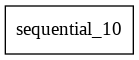

In [ ]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

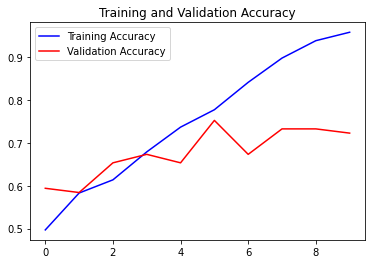

<Figure size 432x288 with 0 Axes>

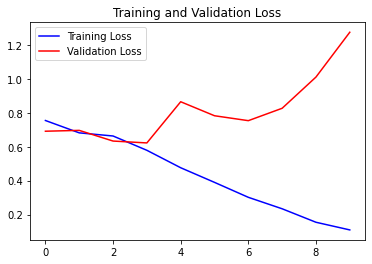

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model_dw.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(test_generator.classes,y_pred)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

from sklearn.metrics import precision_score,recall_score,f1_score
precision= precision_score(test_generator.classes, y_pred)
recall= recall_score(test_generator.classes, y_pred)
print('Precision: %.3f' % precision_score(test_generator.classes, y_pred))
print('Recall: %.3f' % recall_score(test_generator.classes, y_pred))
batch_size=32
test_score = model_dw.evaluate_generator(test_generator, batch_size)
print("accuracy: {:.2f}%".format(test_score[1] * 100))
print("Loss: ",test_score[0])
print("f1 score : ",f1_score(test_generator.classes, y_pred))
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [[[ 21]
  [ 22]
  [ 22]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[ 92]
  [ 91]
  [ 91]
  ...
  [  0]
  [  0]
  [  0]]

 ...

 [[ 44]
  [ 44]
  [ 43]
  ...
  [221]
  [220]
  [220]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [149]
  [148]
  [146]]]
Confusion Matrix


ValueError: ignored